In [1]:
import numpy as np
import pandas as pd
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

import pickle

## Standard_Scaler funcation

In [2]:
def Standard_Scaler (Columns_List, df, scaler):
    df_num=df[Columns_List]
    col=df_num.columns
    df_num=scaler.fit_transform(df_num)
    df_num=pd.DataFrame(df_num,columns=col)
    
    return df_num

## Binarization funcation

In [3]:
def Binarization (Columns_List, df):
    df_not_num=df.drop(Columns_List,axis=1)
    list_=[]

    for i in df_not_num.columns:
        encoder=pd.get_dummies(df_not_num[i],prefix=i)
        list_.append(encoder)
        
    return list_

## Importing Data

In [4]:
df=pd.read_csv("UsedCarsSA_Clean_EN.csv")

In [5]:
df.sample(10)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
1553,Toyota,Hilux,2015,Saudi,White,Full,2.7,Gas,Manual,161000,Dammam,0,True
1664,Ford,Victoria,1997,Saudi,Green,Full,4.8,Gas,Automatic,377,Dammam,12000,False
6097,HAVAL,H2,2020,Gulf Arabic,Red,Semi Full,1.0,Gas,Automatic,29289,Makkah,50000,False
726,Hyundai,Accent,2019,Saudi,White,Standard,1.4,Gas,Automatic,74917,Riyadh,38500,False
6261,GMC,Yukon,2009,Saudi,Black,Full,5.3,Gas,Automatic,309000,Riyadh,0,True
4068,Mazda,CX3,2018,Saudi,Blue,Semi Full,2.9,Gas,Automatic,78000,Al-Medina,54000,False
2152,Toyota,Land Cruiser,2015,Saudi,Grey,Full,5.7,Gas,Automatic,240000,Riyadh,158000,False
5780,Other,Other,2004,Saudi,White,Full,2.4,Diesel,Automatic,6000,Taef,0,True
6071,Ford,Taurus,2013,Other,Silver,Standard,3.5,Gas,Automatic,293000,Riyadh,0,True
1428,Renault,Duster,2014,Other,Brown,Semi Full,2.0,Gas,Manual,135000,Riyadh,0,True


In [6]:
df.shape

(8035, 13)

## Part1: Classification (Negotiable Column)

## Check the value_counts of Negotiable column

In [7]:
df['Negotiable'].value_counts() # Need to clean the gap between them

False    5509
True     2526
Name: Negotiable, dtype: int64

In [8]:
df_Nf = df[df['Negotiable']==False] # Getting the data that has the most value_counts(False)
df_Nf

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8029,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000,False
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


## Getting 2526 rows randomly from dataframe (df_Nf)

In [9]:
df_Nf_Rand = df_Nf.sample(n = 2526, random_state = 2) 
df_Nf_Rand

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
6615,Nissan,Patrol,2016,Saudi,White,Full,5.6,Gas,Automatic,139000,Riyadh,158000,False
5522,Honda,Accord,2016,Other,White,Standard,1.4,Gas,Automatic,233000,Dammam,48000,False
4371,Chevrolet,Tahoe,2015,Other,White,Full,5.3,Gas,Automatic,193000,Dammam,118000,False
2469,Toyota,Hilux,2005,Saudi,White,Standard,2.8,Diesel,Manual,533000,Riyadh,25000,False
656,GMC,Yukon,2015,Saudi,Golden,Semi Full,5.3,Gas,Automatic,101060,Riyadh,125000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,Ford,Taurus,2014,Unknown,White,Standard,3.5,Gas,Automatic,266000,Taef,50000,False
4791,Ford,Mustang,2007,Saudi,Black,Full,2.3,Gas,Manual,300000,Jeddah,28000,False
6864,Mitsubishi,L200,2015,Saudi,White,Standard,2.5,Gas,Manual,103000,Jeddah,30000,False
5478,GMC,Yukon,2020,Saudi,Black,Full,5.3,Gas,Automatic,1800,Riyadh,185000,False


In [10]:
df_Nt = df[df['Negotiable']==True] # Getting the data that had negotiable = True
df_Nt

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
7,GMC,Yukon,2009,Saudi,Bronze,Full,5.7,Gas,Automatic,323000,Riyadh,0,True
18,GMC,Yukon,2018,Saudi,White,Full,5.3,Gas,Automatic,37000,Riyadh,0,True
26,Toyota,Camry,2019,Saudi,Red,Full,2.5,Gas,Automatic,8000,Makkah,0,True
28,Toyota,Avalon,2008,Other,Red,Full,3.5,Gas,Automatic,169000,Riyadh,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,Mazda,CX9,2015,Saudi,Red,Standard,3.6,Gas,Automatic,195000,Al-Medina,0,True
8021,Ford,Explorer,2010,Other,Black,Semi Full,1.6,Gas,Automatic,3275230,Al-Baha,0,True
8022,Toyota,Furniture,2020,Saudi,White,Semi Full,2.7,Gas,Automatic,82000,Makkah,0,True
8024,Toyota,Furniture,2014,Saudi,White,Semi Full,4.0,Gas,Automatic,497480,Riyadh,0,True


## Combine both dataframes (df_Nf_Rand+df_Nt)

In [11]:
df_nEqual = df_Nf_Rand.append(df_Nt)
df_nEqual

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
6615,Nissan,Patrol,2016,Saudi,White,Full,5.6,Gas,Automatic,139000,Riyadh,158000,False
5522,Honda,Accord,2016,Other,White,Standard,1.4,Gas,Automatic,233000,Dammam,48000,False
4371,Chevrolet,Tahoe,2015,Other,White,Full,5.3,Gas,Automatic,193000,Dammam,118000,False
2469,Toyota,Hilux,2005,Saudi,White,Standard,2.8,Diesel,Manual,533000,Riyadh,25000,False
656,GMC,Yukon,2015,Saudi,Golden,Semi Full,5.3,Gas,Automatic,101060,Riyadh,125000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,Mazda,CX9,2015,Saudi,Red,Standard,3.6,Gas,Automatic,195000,Al-Medina,0,True
8021,Ford,Explorer,2010,Other,Black,Semi Full,1.6,Gas,Automatic,3275230,Al-Baha,0,True
8022,Toyota,Furniture,2020,Saudi,White,Semi Full,2.7,Gas,Automatic,82000,Makkah,0,True
8024,Toyota,Furniture,2014,Saudi,White,Semi Full,4.0,Gas,Automatic,497480,Riyadh,0,True


In [12]:
df_nEqual['Negotiable'].value_counts() # They are equal

True     2526
False    2526
Name: Negotiable, dtype: int64

## Shuffle the rows

In [13]:
df_nEqual = df_nEqual.sample(frac=1).reset_index(drop=True)
df_nEqual

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Nissan,Sunny,2018,Gulf Arabic,White,Standard,1.5,Gas,Automatic,59700,Dammam,0,True
1,Hyundai,Tucson,2018,Saudi,Blue,Standard,2.0,Gas,Automatic,143479,Riyadh,61500,False
2,Chrysler,C300,2013,Other,Blue,Full,5.7,Gas,Automatic,178000,Dammam,45000,False
3,Toyota,Hilux,2018,Saudi,White,Semi Full,2.7,Gas,Manual,20000,Aseer,115000,False
4,Toyota,Land Cruiser,1985,Saudi,Another Color,Semi Full,2.0,Gas,Manual,30000,Al-Baha,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,Ford,Explorer,2006,Other,Black,Full,3.5,Gas,Automatic,280,Jazan,0,True
5048,Honda,Accord,2007,Saudi,White,Semi Full,2.4,Gas,Automatic,45000,Makkah,0,True
5049,Kia,Optima,2014,Gulf Arabic,Silver,Full,2.4,Gas,Automatic,200,Al-Medina,45000,False
5050,Kia,Rio,2019,Saudi,Silver,Standard,1.4,Gas,Automatic,55000,Makkah,36000,False


## Standard Scaler Num Columns

In [14]:
scaler1 = StandardScaler()

df_num_Class = Standard_Scaler(['Year','Engine_Size','Mileage'], df_nEqual, scaler1)
df_num_Class

,Year,Engine_Size,Mileage
0,0.717427,-1.210026,-0.235914
1,0.717427,-0.887223,-0.031575
2,-0.105039,1.501520,0.052623
3,0.717427,-0.435299,-0.332743
4,-4.710847,-0.887223,-0.308353
...,...,...,...
5047,-1.256491,0.081186,-0.380841
5048,-1.091998,-0.628981,-0.271767
5049,0.059455,-0.628981,-0.381036
5050,0.881920,-1.274587,-0.247377


## Binarization of Not Num Columns

In [15]:
list_Class = Binarization(['Year','Engine_Size','Mileage','Price', 'Negotiable'], df_nEqual)
list_Class

[      Make_Aston Martin  Make_Audi  Make_BMW  Make_BYD  Make_Bentley  \
 0                     0          0         0         0             0   
 1                     0          0         0         0             0   
 2                     0          0         0         0             0   
 3                     0          0         0         0             0   
 4                     0          0         0         0             0   
 ...                 ...        ...       ...       ...           ...   
 5047                  0          0         0         0             0   
 5048                  0          0         0         0             0   
 5049                  0          0         0         0             0   
 5050                  0          0         0         0             0   
 5051                  0          0         0         0             0   
 
       Make_Cadillac  Make_Changan  Make_Chery  Make_Chevrolet  Make_Chrysler  \
 0                 0             0       

## Combine Dataframes

In [16]:
df_combined_Class = pd.concat([df_num_Class,list_Class[0],list_Class[1],list_Class[2],list_Class[3],list_Class[4],list_Class[5],list_Class[6],list_Class[7]],axis=1)
df_combined_Class

,Year,Engine_Size,Mileage,Make_Aston Martin,Make_Audi,Make_BMW,Make_BYD,Make_Bentley,Make_Cadillac,Make_Changan,...,Region_Najran,Region_Qassim,Region_Qurayyat,Region_Riyadh,Region_Sabya,Region_Sakaka,Region_Tabouk,Region_Taef,Region_Wadi Dawasir,Region_Yanbu
0,0.717427,-1.210026,-0.235914,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.717427,-0.887223,-0.031575,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.105039,1.501520,0.052623,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.717427,-0.435299,-0.332743,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-4.710847,-0.887223,-0.308353,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,-1.256491,0.081186,-0.380841,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5048,-1.091998,-0.628981,-0.271767,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5049,0.059455,-0.628981,-0.381036,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5050,0.881920,-1.274587,-0.247377,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the dataframe to train & test

In [17]:
x=df_combined_Class
y=df_nEqual['Negotiable']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

## Random Forest For Classification

### Train

In [18]:
class_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
class_forest.fit(X_train, Y_train)

preds_class = class_forest.predict(X_train)

In [19]:
print("Accuracy:",np.round(metrics.accuracy_score(Y_train, preds_class),2))
print("Precision:",np.round(metrics.precision_score(Y_train, preds_class),2))
print("Recall:",np.round(metrics.recall_score(Y_train, preds_class),2))

Accuracy: 0.98
Precision: 0.99
Recall: 0.97


### Test

In [20]:
preds_class = class_forest.predict(X_test) # For test

In [21]:
print("Accuracy:",np.round(metrics.accuracy_score(Y_test, preds_class),2))
print("Precision:",np.round(metrics.precision_score(Y_test, preds_class),2))
print("Recall:",np.round(metrics.recall_score(Y_test, preds_class),2))

Accuracy: 0.62
Precision: 0.6
Recall: 0.58


In [22]:
val_train = round(class_forest.score(X_train, Y_train),2)*100
val_test = round(class_forest.score(X_test, Y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 98.0%
Test Set Accuracy: 62.0%


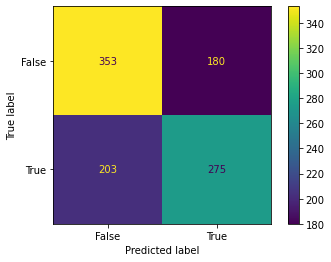

In [23]:
plot_confusion_matrix(class_forest, X_test, Y_test);

# Save The Model

In [24]:
pickle.dump(class_forest, open('Comets_Classification_Model.sav', 'wb'))
pickle.dump(scaler1, open('Comets_Class_S_Model.sav', 'wb'))

****

## Part2: Regression (Price Column)

In [25]:
df.sample(10)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
290,Changan,Seven,2020,Saudi,Silver,Standard,1.5,Gas,Automatic,49214,Riyadh,27500,False
1869,Porsche,Macan,2015,Saudi,Another Color,Full,3.5,Gas,Automatic,93000,Jeddah,138000,False
4670,Honda,Accord,2012,Saudi,Red,Full,3.5,Gas,Automatic,300,Tabouk,36000,False
3874,Toyota,Rav4,2018,Gulf Arabic,White,Full,2.5,Gas,Automatic,84000,Jubail,85000,False
2625,GMC,Yukon,2007,Unknown,Grey,Full,5.3,Gas,Automatic,300000,Riyadh,0,True
4324,Toyota,Hilux,2009,Saudi,White,Standard,1.5,Gas,Manual,25788,Makkah,30000,False
685,Hyundai,Sonata,2019,Saudi,White,Full,2.4,Gas,Automatic,48000,Riyadh,68000,False
1948,GMC,Yukon,2015,Saudi,Silver,Standard,5.3,Gas,Automatic,170000,Arar,102000,False
3097,Land Rover,Range Rover,2016,Gulf Arabic,Black,Full,5.0,Gas,Automatic,120346,Riyadh,257000,False
1118,Hyundai,Elantra,2019,Saudi,Silver,Standard,1.6,Gas,Automatic,103358,Riyadh,48500,False


In [26]:
df_withPrice = df[df['Negotiable']==False] # Getting the data that has price more than 0
df_withPrice = df_withPrice.reset_index(drop=True)
df_withPrice

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
2,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
3,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
4,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5504,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000,False
5505,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
5506,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
5507,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


## Standard Scaler Num Columns

In [27]:
scaler2 = StandardScaler()

df_num_Reg = Standard_Scaler(['Year','Engine_Size','Mileage'], df_withPrice, scaler2)
df_num_Reg

,Year,Engine_Size,Mileage
0,0.614765,1.720813,-0.108677
1,0.809272,-1.145161,-0.200018
2,0.809272,-1.076923,-0.075363
3,0.809272,-0.803973,-0.291131
4,0.614765,-1.145161,-0.299828
...,...,...,...
5504,-1.719310,0.219589,0.351280
5505,0.031247,-0.121599,-0.186332
5506,-0.941285,0.287826,0.031699
5507,-0.746778,-0.462786,-0.361056


## Binarization of Not Num Columns

In [28]:
list_Reg = Binarization(['Year','Engine_Size','Mileage','Price', 'Negotiable'], df_withPrice)
list_Reg

[      Make_Aston Martin  Make_Audi  Make_BMW  Make_BYD  Make_Bentley  \
 0                     0          0         0         0             0   
 1                     0          0         0         0             0   
 2                     0          0         0         0             0   
 3                     0          0         0         0             0   
 4                     0          0         0         0             0   
 ...                 ...        ...       ...       ...           ...   
 5504                  0          0         0         0             0   
 5505                  0          1         0         0             0   
 5506                  0          0         0         0             0   
 5507                  0          0         0         0             0   
 5508                  0          0         0         0             0   
 
       Make_Cadillac  Make_Changan  Make_Chery  Make_Chevrolet  Make_Chrysler  \
 0                 0             0       

## Combine Dataframes

In [29]:
df_combined_Reg = pd.concat([df_num_Reg,list_Reg[0],list_Reg[1],list_Reg[2],list_Reg[3],list_Reg[4],list_Reg[5],list_Reg[6],list_Reg[7]],axis=1)
df_combined_Reg

,Year,Engine_Size,Mileage,Make_Aston Martin,Make_Audi,Make_BMW,Make_BYD,Make_Bentley,Make_Cadillac,Make_Changan,...,Region_Najran,Region_Qassim,Region_Qurayyat,Region_Riyadh,Region_Sabya,Region_Sakaka,Region_Tabouk,Region_Taef,Region_Wadi Dawasir,Region_Yanbu
0,0.614765,1.720813,-0.108677,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.809272,-1.145161,-0.200018,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.809272,-1.076923,-0.075363,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.809272,-0.803973,-0.291131,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.614765,-1.145161,-0.299828,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5504,-1.719310,0.219589,0.351280,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5505,0.031247,-0.121599,-0.186332,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5506,-0.941285,0.287826,0.031699,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5507,-0.746778,-0.462786,-0.361056,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the dataframe to train & test

In [30]:
x=df_combined_Reg
y=df_withPrice['Price']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

## RandomForest Regressor

### Train

In [31]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

preds_Reg = regressor.predict(X_train)

In [32]:
print("Score:",np.round(regressor.score(X_train, Y_train),2))
print("MAE:",np.round(metrics.mean_absolute_error(Y_train, preds_Reg),2))
print("MSE:",np.round(metrics.mean_squared_error(Y_train, preds_Reg),2))
print("RMSE:",np.round(metrics.mean_squared_error(Y_train, preds_Reg, squared=False),2))

Score: 0.97
MAE: 5670.99
MSE: 161706492.58
RMSE: 12716.39


### Test

In [33]:
preds_Reg = regressor.predict(X_test)

In [34]:
print("Score:",np.round(regressor.score(X_test, Y_test),2))
print("MAE:",np.round(metrics.mean_absolute_error(Y_test, preds_Reg),2))
print("MSE:",np.round(metrics.mean_squared_error(Y_test, preds_Reg),2))
print("RMSE:",np.round(metrics.mean_squared_error(Y_test, preds_Reg, squared=False),2))

Score: 0.82
MAE: 14532.37
MSE: 949211268.19
RMSE: 30809.27


# Save The Model

In [35]:
pickle.dump(regressor, open('Comets_Regression_Model.sav', 'wb'))
pickle.dump(scaler2, open('Comets_Regr_S_Model.sav', 'wb'))

****

## Part 3: Creating Function to Prediction for Classification (Negotiable Column) & Regression (Price Column)

In [36]:
def Make_Prediction (Make, Type, Year, Origin, Color, Options, Engine_Size,
       Fuel_Type, Gear_Type, Mileage, Region, df_combined, scaler, model):
    # Insert data inside dataframe
    df_pred = pd.DataFrame([[Make, Type, Year, Origin, Color, Options, Engine_Size, Fuel_Type, Gear_Type, 
                             Mileage, Region]], 
                           columns = ['Make', 'Type', 'Year', 'Origin', 'Color', 'Options', 'Engine_Size',
       'Fuel_Type', 'Gear_Type', 'Mileage', 'Region'])
    
    # Create an empty dataframe(add 0 to all columns) to prepare it for prediction
    Final_df_pred = pd.DataFrame(0, index=np.arange(1), columns = df_combined.columns)
    
    # Standard_Scaler
    df_num = Standard_Scaler(['Year','Engine_Size','Mileage'], df_pred, scaler)
    
    # Binarization
    list_ = Binarization(['Year','Engine_Size','Mileage'], df_pred)

    # Combine Dataframes
    df_combined_ = pd.concat([df_num,list_[0],list_[1],list_[2],list_[3],list_[4],list_[5],list_[6],list_[7]],axis=1)
    
    # Add data from combine df to empty dataframe to make prediction
    for i in range (len(df_combined_.columns)):
        for j in range (len(Final_df_pred.columns)):
            if df_combined_.columns[i] == Final_df_pred.columns[j]:
                Final_df_pred[Final_df_pred.columns[j]]=df_combined_[df_combined_.columns[i]][0]
            
            
    return model.predict(Final_df_pred.to_numpy())[0]

****

## Part 4: Creating a Logical Function to Predict if The Deal is Bad, Good, or Excellent Based on Custom Baseline

## Create a Baseline for price depend on [Make,Type,Year]

In [37]:
baseline_price1 = pd.DataFrame(columns=['Make','Type','Year','Average_Price'])
baseline_price1[['Make','Type','Year','Average_Price']] = df_withPrice[['Make','Type','Year','Price']]
baseline_price1.groupby(['Make','Type','Year']).mean()

mean = baseline_price1.groupby(['Make','Type','Year']).mean()
baseline_price = pd.DataFrame(columns=['Make','Type','Year','Average_Price'])

for x in range(len(mean.index)):
    baseline_price = baseline_price.append({'Make': mean.index[x][0] ,
                                            'Type': mean.index[x][1] ,
                                            'Year': mean.index[x][2] ,
                                            'Average_Price': (mean.iloc[x,0]).astype(int)},
                                                    ignore_index=True)

In [38]:
baseline_price

,Make,Type,Year,Average_Price
0,Aston Martin,DB9,2010,180000
1,Aston Martin,Vanquish,2013,400000
2,Aston Martin,Vantage,2012,550000
3,Audi,A3,2016,69166
4,Audi,A3,2020,105000
...,...,...,...,...
1617,Volkswagen,Touareg,2015,69000
1618,Zhengzhou,Pick up,2016,35000
1619,Zhengzhou,Pick up,2020,35000
1620,Škoda,Fabia,2007,6000


## Create Function for if the car is a good or bad deal

In [39]:
def preds (make,type_,year,mileage,price,baseline_price):
    
    Average_Per_Year = ''
    Average_Per_Price = ''
    deal = ''
    
    # for Average Year
    if year == 2021:
        year_used = 1
    else :
        year_used = 2021 - year
        
    for x in range(len(df)):
        if year_used * 16000 < mileage:
            #print(f"{(2021 - df.iloc[x,2]) * 16000} < {df.iloc[x,9]}")
            Average_Per_Year = "Above"
        elif year_used * 16000 > mileage:
            #print(f"{(2021 - df.iloc[x,2]) * 16000} > {df.iloc[x,9]}")
            Average_Per_Year = "Below"
        else:
            #print(f"{(2021 - df.iloc[x,2]) * 16000} = {df.iloc[x,9]}")
            Average_Per_Year = "Equal"
    
    # for Average Price
    for x in range(len(baseline_price)):
        if (make == baseline_price.iloc[x,0]) & (type_ == baseline_price.iloc[x,1]) & (year == baseline_price.iloc[x,2]):
            if (price > baseline_price.iloc[x,3]) & (price > 0) :
                Average_Per_Price = "Above"
                break
            elif (price < baseline_price.iloc[x,3]) & (price > 0):
                Average_Per_Price = "Below"
                break
                
            elif (price == baseline_price.iloc[x,3]) & (price > 0):
                Average_Per_Price = "Equal"
                break
                
            else:
                Average_Per_Price = "Zero"
                break
    
    # for deal            
    if (Average_Per_Year == "Above") & (Average_Per_Price == "Above"):
        deal = "Bad Deal"
    elif ((Average_Per_Year == "Above") & (Average_Per_Price == "Below")) | ((Average_Per_Year == "Below") & (Average_Per_Price == "Above")) | ((Average_Per_Year == "Below") & (Average_Per_Price == "Equal")):
        deal = "Good Deal"
    elif (Average_Per_Year == "Below") & (Average_Per_Price == "Below"):
        deal = "Excellent Deal"
    elif ((Average_Per_Year == "Above") & (Average_Per_Price == "Zero")) | ((Average_Per_Year == "Below") & (Average_Per_Price == "Zero")):
        deal = "Negotiable"
    else:
        deal = "Fine Deal"
        
    print("Summary of {} \n".format(baseline_price[(baseline_price['Make'] == make)&(baseline_price['Type'] == type_)&(baseline_price['Year'] == year)].iloc[0,0:3].values))
    print("Baseline Price = {}".format(baseline_price[(baseline_price['Make'] == make)&(baseline_price['Type'] == type_)&(baseline_price['Year'] == year)].iloc[0,-1]))     
    print("Actual   Price = {} \n".format(price))
    print("Baseline Mileage = {}".format(year_used * 16000))
    print("Actual   Mileage = {}".format(mileage))
        
    print('\n\nResult:')       
    print(f"Average Price   : {Average_Per_Price}\nAverage Mileage : {Average_Per_Year}\nDeal Is         : {deal}")

****

## Comets App

### For Seller

In [40]:
print("Make the price of your car based on the negotiable?")
Make_Prediction('Honda', 'Accord', 2015, 'Saudi', 'White', 'Standard', 1.4, 'Gas', 'Automatic', 
                30000, 'Dammam', df_combined_Class, scaler1, class_forest)

Make the price of your car based on the negotiable?


False

In [43]:
print("Expected price of your car:")
Make_Prediction('Honda', 'Accord', 2015, 'Saudi', 'White', 'Standard', 1.4, 'Gas', 'Automatic', 
                30000, 'Dammam', df_combined_Reg, scaler2, regressor)

Expected price of your car:


56135.0

### For Buyer

In [42]:
preds('Toyota','Innova',2017,145997,64000,baseline_price)

Summary of ['Toyota' 'Innova' 2017] 

Baseline Price = 64583
Actual   Price = 64000 

Baseline Mileage = 64000
Actual   Mileage = 145997


Result:
Average Price   : Below
Average Mileage : Above
Deal Is         : Good Deal
